## 例8-1 使用 Python 计算简单图像梯度

In [14]:
import matplotlib.pyplot as plt
# %matplotlib notebook
from skimage.feature import hog
from skimage import data, color, exposure
import numpy as np

In [4]:
# 加载示例图像，并转换为灰度模式
image = color.rgb2gray(data.chelsea())

In [11]:
import pandas as pd
print(image.shape)
pd.DataFrame(image).head()

(300, 451)


,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,450
0,0.485231,0.485231,0.477388,0.477388,0.477388,0.477388,0.477388,0.485231,0.489153,0.493074,...,0.117489,0.117489,0.121411,0.115517,0.115517,0.124462,0.124462,0.116924,0.116924,0.116924
1,0.496996,0.493074,0.485231,0.481309,0.481309,0.481309,0.481309,0.481309,0.489153,0.493074,...,0.121411,0.121411,0.121411,0.119439,0.119439,0.128383,0.125600,0.123368,0.122535,0.127290
2,0.508493,0.504571,0.494756,0.490834,0.493074,0.489153,0.485231,0.485231,0.488587,0.496430,...,0.129254,0.125333,0.125333,0.129254,0.125333,0.129522,0.125600,0.123360,0.127282,0.131204
3,0.520540,0.512697,0.504854,0.504854,0.500649,0.496728,0.493074,0.493074,0.488587,0.492509,...,0.137097,0.137097,0.129254,0.141019,0.133176,0.136532,0.133176,0.133176,0.137663,0.137663
4,0.528949,0.521105,0.516618,0.512697,0.508493,0.504571,0.500917,0.500917,0.500917,0.496996,...,0.142968,0.148862,0.141019,0.148862,0.144940,0.145208,0.145208,0.140453,0.144375,0.144375


In [18]:
# 使用中心化的一维滤波器计算水平梯度。
# 这等价于将每个非边界像素替换为它的左侧相邻像素和右侧相邻像素的差。
# 最左边和最右边上的像素的梯度是0。
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]
# 以同样的方式计算垂直梯度
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

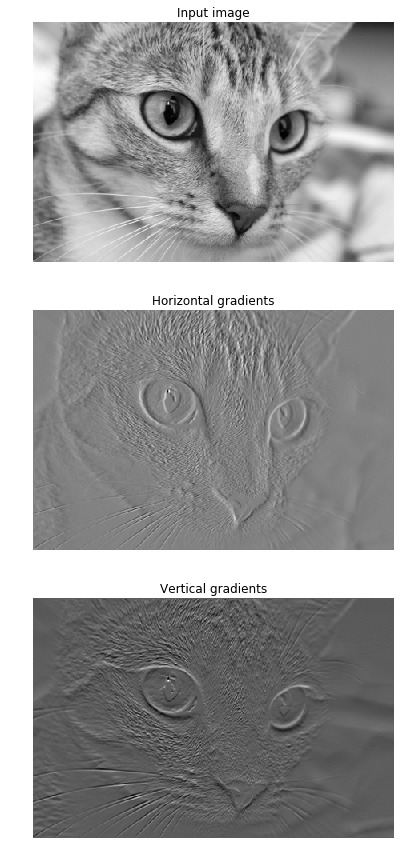

In [26]:
# Matplotlib命令
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box-forced')

ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box-forced')

In [28]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(
    16, 16), cells_per_block=(1, 1), visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

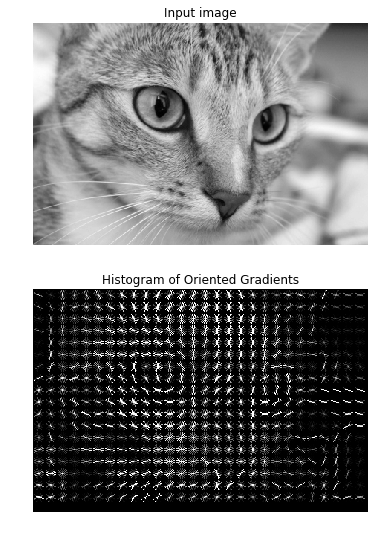

In [30]:
# Matplotlib命令
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box-forced')